In [31]:
# Ch.3 Lab: Linear Regression

In [32]:
# 3.6.1 Importing packages

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [34]:
# Show a list of objects in a namespace

dir()

['A',
 'Boston',
 'In',
 'MS',
 'Out',
 'VIF',
 'X',
 '_',
 '_10',
 '_14',
 '_20',
 '_21',
 '_22',
 '_24',
 '_25',
 '_26',
 '_27',
 '_4',
 '_5',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'design',
 'exit',
 'get_ipython',
 'load_data',
 'model',
 'newX',
 'new_df',
 'new_predictions',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'results',
 'sm',
 'subplots',
 'summarize',
 'y']

In [35]:
# Return a list of valid attributes and methods for an object

A = np.array([[3, 4, 1],[22, 10, 64]])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [36]:
print(A.sum())
print(A.T)

104
[[ 3 22]
 [ 4 10]
 [ 1 64]]


In [37]:
# 3.6.2 Simple Linear Regression

In [38]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [39]:
Boston?

Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           0    0.00632  18.0   2.3 <...> 0   5.64  23.9
           504     21.0   6.48  22.0
           505     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        ~/.local/lib/python3.13/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index. This

In [40]:
# Simple linear regression model
# Response: 'medv'
# predictor: 'lstat'

X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [41]:
# Extract response from Boston

y = Boston['medv']

In [42]:
# Specify the model

model = sm.OLS(y, X)

In [43]:
# Solve the linear regression equation using Ordinary Least Squares

results = model.fit()

In [44]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [59]:
# Before we describe other methods for working with fitted models, 
# we outline a more useful and general framework for constructing a model matrix X

In [46]:
# Using Transformations: Fit and Transform

In [61]:
# Create a transform object using MS()
# The object has two methods: fit() and transform()

design = MS(['lstat'])

In [67]:
# Take the original array and do some initial computations
# such as means and std.dev for centering & scaling.
# Check if 'lstat' specified in design exists in Boston

design = design.fit(Boston)

In [64]:
# Apply the fitted transformation to the array of data,
# and produce the model matrix X.

X = design.transform(Boston)

In [50]:
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [65]:
# fit() and transform() can be combined with fit_transform()

design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [51]:
# Full summary of the fitted regression model

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           5.08e-88
Time:                        21:08:18   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Fitted coefficients

results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [53]:
# Predition of 'medv' for given values of 'lstat'
# Step 1: Create a new data frame containing only 'lstat', with 
# the values for this variables at which we wish to make predictions.

new_df = pd.DataFrame({'lstat':[5, 10, 15]})

In [54]:
# Step 2: Use transform() method of design to create the corresponding model matrix

newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [69]:
# Step 3: Compute predictions at newX, 
# and view them by extracting the predicted_mean attribute.

new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [56]:
# Confidence Intervals for the predicted values

new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [57]:
# Prediction Intervals

new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [58]:
# Analysis

# The 95% Confidence Interval associated with an 'lstat' value of 10 is 
# (24.47, 25.63), and the 95% Prediction Interval is (12.82, 37.28).
# The confidence and prediction intervals are centered around the same point
# (a predicted value of 25.05 for 'medv' when 'lstat' equals 10), but the latter
# are substantially wider.

In [70]:
# Defining Functions

In [71]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)

In [72]:
# Adding more arguments

def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

/var/folders/_4/6gm_40x10338j_jk684cf3w80000gn/T/ipykernel_67223/58399881.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)


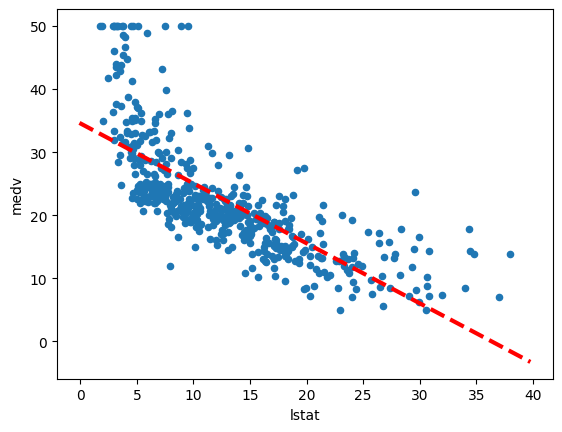

In [77]:
# Plot 'medv' vs 'lstat' with function abline()

ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)

/var/folders/_4/6gm_40x10338j_jk684cf3w80000gn/T/ipykernel_67223/3722652101.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0,results.params[0]), slope=results.params[1], color='red', linestyle='--')


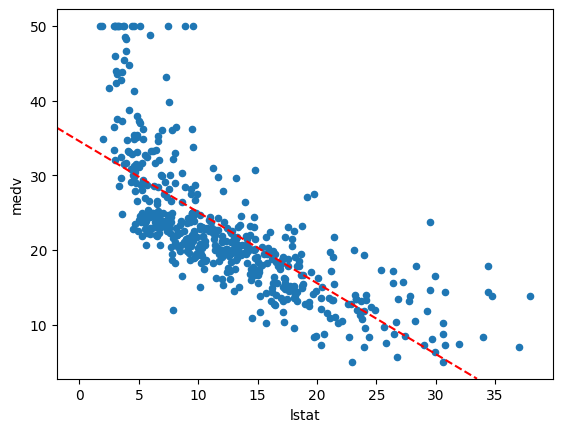

In [89]:
# Drawing a line with an existing function: ax.axline()

ax = Boston.plot.scatter('lstat', 'medv')
ax.axline((0,results.params[0]), slope=results.params[1], color='red', linestyle='--')

In [90]:
# We can find the fitted values and residuals of the fit as attributes
# of the results object

dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pval

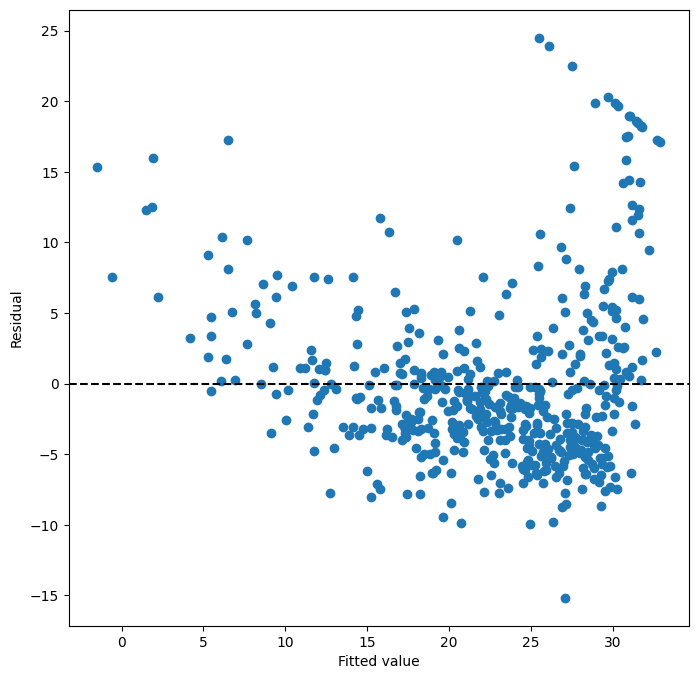

In [97]:
# Diagnostic plots
# Residual Plot: There is some evidence of non-linearity

ax = subplots(figsize=(8,8))[1] # Only use the second returned value from subplots()
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--'); # c='k' -> use black color

'Observation 374 is a high leverage point.'


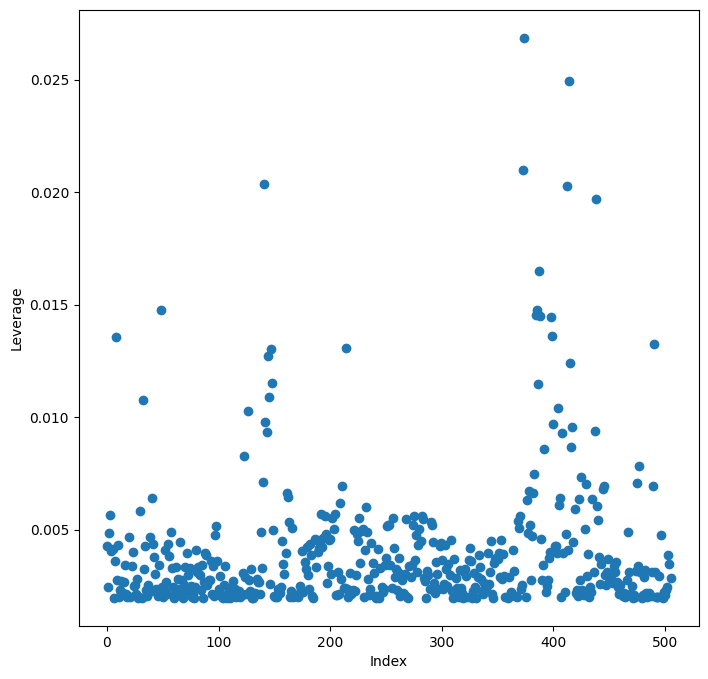

In [105]:
# Leverage statistics 
# Use the hat_matrix_diag attribute of the value returned by the get_influence()

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

# np.argmax() returns the index of the maximum value in an array

print(f"\'Observation {np.argmax(infl.hat_matrix_diag)} is a high leverage point.\'");

In [106]:
# 3.6.3 Multiple Linear Regression

In [108]:
X = MS(['lstat', 'age']).fit_transform(Boston)
X.head()

,intercept,lstat,age
0,1.0,4.98,65.2
1,1.0,9.14,78.9
2,1.0,4.03,61.1
3,1.0,2.94,45.8
4,1.0,5.33,54.2


In [110]:
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [113]:
# Set terms: all columns from Boston except 'medv'

terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [116]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [119]:
# Regression using all predictors except 'age'
# 'age' has high p-value, so it will be excluded from this model

minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [120]:
# 3.6.4 Multivariate Goodness of Fit

In [121]:
# List Comprehension

In [124]:
# Compute the VIF for each of the variables in the model matrix X,
# using the function variance_inflation_factor() -> imported as VIF

vals = [VIF(X, i) for i in range(1, X.shape[1])] # List Comprehension
vif = pd.DataFrame({'vif': vals}, index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [134]:
# 3.6.5 Interaction Terms

In [143]:
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [135]:
# 3.6.6 Non-linear Transformations of the Predictors

In [137]:
# The effectively zero p-value associated with the quadratic term 
# (i.e. the third row above) suggests that it leads to an improved model.

X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [138]:
# Quantify the extent to which the quadratic fit is superior to the linear fit
# The anova_lm() function performs a hypothesis test comparing the two models. 
# Null hypothesis: the quadratic term in the bigger model is not needed 
# Alternative hypothesis: the bigger model is superior

anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


In [139]:
# F-statistic: 177.28 and the associated p-value: zero. 
# In this case the F-statistic is the square of the t-statistic 
# for the quadratic term in the linear model summary for results3 
# --- a consequence of the fact that these nested models differ by one degree of freedom. 
# This provides very clear evidence that the quadratic polynomial in lstat 
# improves the linear model.

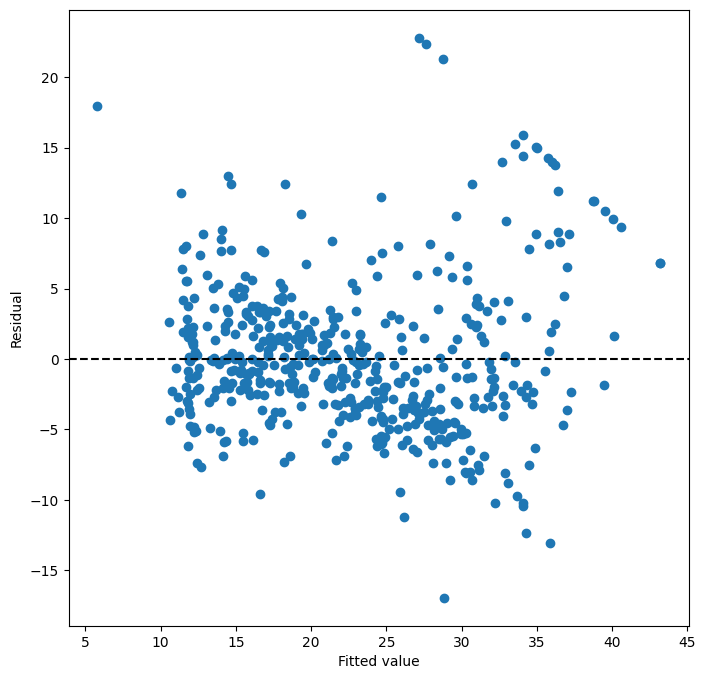

In [144]:
# Residual Plot

ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [145]:
# 3.6.7 Qualitative Predictors

In [146]:
Carseats = load_data('Carseats')

In [147]:
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [152]:
# ModelSpec() generates dummy variables automatically. 
# These variables are often referred to as a one-hot encoding of the categorical feature. 
# Their columns sum to one, so to avoid collinearity with an intercept, 
# the first column is dropped. Below we see the column ShelveLoc[Bad] 
# has been dropped, since Bad is the first level of ShelveLoc.

In [153]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


In [151]:
# Our model-matrix builder has created a ShelveLoc[Good] dummy variable
# that takes on a value of 1 if the shelving location is good, and 0 otherwise.
# It has also created a ShelveLoc[Medium] dummy variable that equals 1 
# if the shelving location is medium, and 0 otherwise. 
# A bad shelving location corresponds to a zero for each of the two dummy variables. 
# The fact that the coefficient for ShelveLoc[Good] in the regression output is 
# positive indicates that a good shelving location is associated with high sales 
# (relative to a bad location). And ShelveLoc[Medium] has a smaller positive 
# coefficient, indicating that a medium shelving location leads to higher sales 
# than a bad shelving location, but lower sales than a good shelving location.